In [24]:
import pandas as pd

df_age = pd.read_csv("National_Total_Deaths_by_Age_Group.csv")

df_regional = pd.read_csv("Regional_Totals_Data.csv")

df_daily = pd.read_csv("Regional_Daily_Cases.csv")


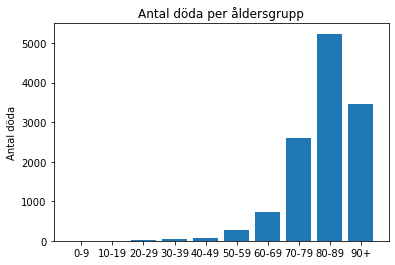

In [20]:
import matplotlib.pyplot as plt

df_age

total_cases = df_age["Total_Deaths"]

ages = df_age["Age_Group"]

x_pos = range(len(ages))

plt.bar(ages,total_cases)
plt.xticks(x_pos,ages)
plt.ylabel("Antal döda")
plt.title("Antal döda per åldersgrupp")
plt.show()


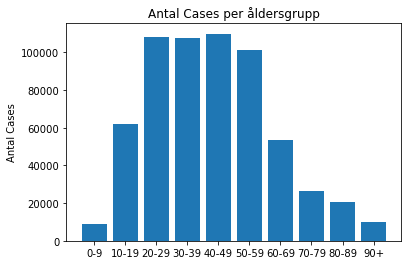

In [21]:
import matplotlib.pyplot as plt

df_age

total_cases = df_age["Total_Cases"]

ages = df_age["Age_Group"]

x_pos = range(len(ages))

plt.bar(ages,total_cases)
plt.xticks(x_pos,ages)
plt.ylabel("Antal Cases")
plt.title("Antal Cases per åldersgrupp")
plt.show()

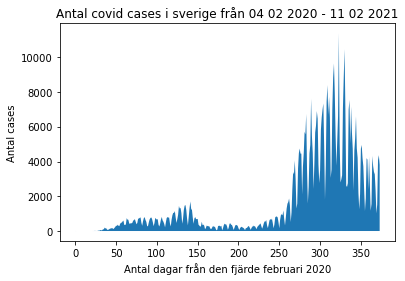

In [39]:
# library
import matplotlib.pyplot as plt

# Create data
daily_cases= df_daily["Sweden_Total_Daily_Cases"]
days = range(len(df_daily["Date"]))

# Area plot((
plt.fill_between(days, daily_cases)
plt.xlabel("Antal dagar från den fjärde februari 2020")
plt.ylabel("Antal cases")
plt.title("Antal covid cases i sverige från 04 02 2020 - 11 02 2021")
plt.show()


In [17]:
import plotly.express as px
import pandas as pd


df_daily = pd.read_csv("Regional_Daily_Cases.csv")

fig = px.line(df_daily,x='Date',y= 'Sweden_Total_Daily_Cases',title= "Daily cases sweden")
fig.show()
#tärningskast

In [162]:
#importerar de nödvändiga plugins vi behöver
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#läsa in exel documenten och ger namn för enkel användning
df_age = pd.read_csv("National_Total_Deaths_by_Age_Group.csv")
df_regional = pd.read_csv("Regional_Totals_Data.csv")
df_daily = pd.read_csv("Regional_Daily_Cases.csv")


fig = make_subplots(rows=4,cols=1, #Gjör själva subploten som gör så att vi kan gjöra flera grafer i en fyrkant och ger den värdet fig och gör storleken till 4 rader och 1 columb
specs=[#Detta behövs när vi ska rita olika typer av grafer 
    #type gjörs så att vi kan gjöra olika varianter av grafer på grund av att alla grafer inte är xy kordinat grafer
    [{"type": "domain"}],#domain behövs för pie charts
    [{"type": "xy"}],  #xy är ordinära xy axel grafer
    [{"type": "xy"}], #Det behövs en type för varje rad
    [{"type": "xy"}],
    ],
   
subplot_titles= ("Antal smittade i varje region","Antal smittade per dag","Regional covid data","Smittningar och antal döda per åldersgrupp") #nämner subplotsen 
)

#Graf 1 pie chart av alla covid smittningar per region
fig.add_trace(#gjör själva grafen med fig comandet som vi gjorde tidigar och add trace för att lägga till en bit med andra ord en graf
    go.Pie( #använder go för att rita själva formen som vi vill ha som i detta faller är en Pie plot
    labels=df_regional["Region"], #använd exeldatan för att nämna statistiken 
    values=df_regional["Total_Cases"], #antal numemr smittningar som omvänds till procentenheter
    showlegend=False, #gömmer legend namn som skulle visas upp, med andra ord lables 
    ),
    row=1,col=1, #positionen av grafen
)
#Graf 2 En graf för dagliga oivid utvecklingen 
fig.add_trace(
    go.Scatter( #Är en linijegraf vilket ändrar namnet
        x=df_daily["Date"], #liknar cirkeldiagrammet men istället för att ge namn som en variabel så ger vi x och y värden på grund av att det är en xy graf
        y=df_daily["Sweden_Total_Daily_Cases"],
        name="Antal smittade per dag", # ger namn på denna specifika färgen/data
    ),
    row=2, col=1 # positionering i rad 2 column 1
)
#Graf 3.1 för antal smittade per 100tusen människor 
#denna graf är egentligen 3 grafer men eftersom de har samma position så ritas de på varandra vilket gjör att de blir en bar chart med 3 olika data columber 
fig.add_trace(
    go.Bar( #bar chart
    x=df_regional["Region"],#Delar xvärde med graf 3.1-3.3 på grund av att de delar position och därför behöver ha samma x axel på grund av regionaliteten 
    y=df_regional["Cases_per_100k_Pop"],
    name="Antal smittade per 100tusen ",
    ),
    row=3,col=1 #samma position på grafer 3.1-3.3
)# graf 3.2 antal personer i intensiv vården per region
fig.add_trace(
    go.Bar(
    x=df_regional["Region"],
    y=df_regional["Total_ICU_Admissions"],#antal personer i intensivvården 
    name="Antal i intensiv vård"
    ),
    row=3,col=1
)#3.3 Antal döda i varje region
fig.add_trace(
    go.Bar(
    x=df_regional["Region"],
    y=df_regional["Total_Deaths"],#antal döda i varje region
    name="Antal döda"
    ),
    row=3,col=1
)
#Graf 4.1 för sortering av dödsfall och smittningar per åldersgrupp 
fig.add_trace(
    go.Bar(
    x=df_age['Age_Group'],
    y=df_age['Total_Cases'],
    name="Covid smittningar",
    ),
    row=4, col=1, 
)
#graf 4.2 Visar grafen för antal döda pper ådersgrupp
fig.add_trace(
    go.Bar(
    x=df_age["Age_Group"],
    y=df_age["Total_Deaths"],
    name= "Antal döda"
    ),
    #placeras på den tidigare grafen så värden kan jämföras enklare
    row=4, col=1
)
#Updaterar pie grafen så att texten är innuti grafen och hover effekten visar statistiken bättre
fig.update_traces(textposition='inside',textinfo='percent+label', selector=dict(type='pie')) #selector läser av figen och kollar om typen är en pie chart vilket gjör så att bara den blir uppdaterad och länar de andra fig graferna

#uppdaterar Layouten såstorleken passar och namnger grafen
fig.update_layout(
    title_text="Covid stats sverige",
    height= 1200,
    width= 1200,        
    ) 

#Ritar graferan som vi har gjort
fig.show()
